In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [20]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads)

200

In [5]:
#Vamos a ir fabricando uno a uno cada una de las partes del cálculo del coeficiente de correlación de PEARSON
data_ads["Corr_Num_TV"]=(data_ads["TV"] - np.mean(data_ads["TV"]))*(data_ads["Sales"]-np.mean(data_ads["Sales"]))

In [6]:
data_ads.head()

,TV,Radio,Newspaper,Sales,Corr_Num_TV
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [7]:
data_ads["Corr_Den_1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,Corr_Num_TV,Corr_Den_1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [8]:
data_ads["Corr_Den_2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
data_ads.head()

,TV,Radio,Newspaper,Sales,Corr_Num_TV,Corr_Den_1,Corr_Den_2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [9]:
# Se realiza el coeficiente! 
Corr_pearson = sum(data_ads["Corr_Num_TV"])/np.sqrt(sum(data_ads["Corr_Den_1"])*(sum(data_ads["Corr_Den_2"])))
Corr_pearson 

0.782224424861606

In [13]:
# vamos a crear una función que nos de eso solamente pasando los parametros.
def corr_coeff(dataset, var1, var2):
    dataset["num_1"]=(dataset[var1] - np.mean(dataset[var1]))*(dataset[var2]-np.mean(dataset[var2]))
    dataset["den_1"]=(dataset[var1] - np.mean(dataset[var1]))**2 
    dataset["den_2"]=(dataset[var2] - np.mean(dataset[var2]))**2 
    Cor_coe = sum(dataset["num_1"])/np.sqrt(sum(dataset["den_1"])*(sum(dataset["den_2"])))
    return Cor_coe

In [14]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [24]:
# si queremos ver todos los coeficientes de correlación entre ellos: 
cols = data_ads.columns.values

for x in cols: 
    for y in cols: 
        print(x + ", " + y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


Text(0, 0.5, 'Ventas')

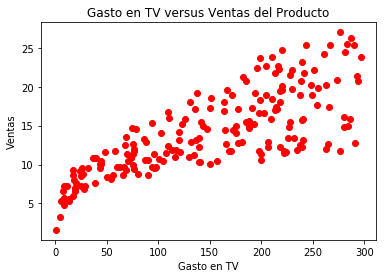

In [34]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV versus Ventas del Producto")
plt.xlabel("Gasto en TV")
plt.ylabel("Ventas")

Text(0, 0.5, 'Ventas')

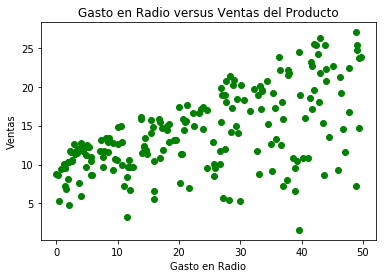

In [35]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio versus Ventas del Producto")
plt.xlabel("Gasto en Radio")
plt.ylabel("Ventas")

Text(0, 0.5, 'Ventas')

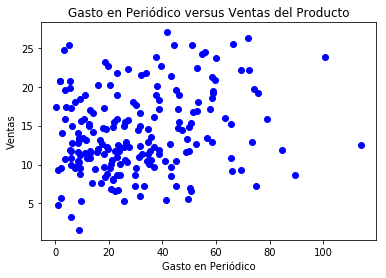

In [36]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico versus Ventas del Producto")
plt.xlabel("Gasto en Periódico")
plt.ylabel("Ventas")

In [37]:
#Sin embargo ya existe una función que nos da las correlaciones en python, es: CORR
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


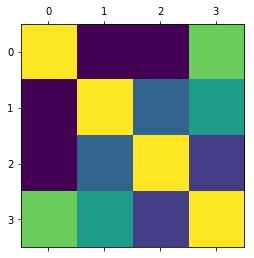

In [38]:
plt.matshow(data_ads.corr())